In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA


import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import AgglomerativeClustering


import warnings 

In [5]:
data = pd.read_csv('C:\\Users\\user\\Desktop\\research\\AI-proj\\data\\fish_school_pre_modeling.csv')
df= data.copy()

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)


***PCA***

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [12]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_data)

pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])

In [13]:
pc_df = pc_df[(pc_df["PC1"] < 20) & (pc_df["PC2"] > -20) & (pc_df["PC3"] < 8)] # removing outliers

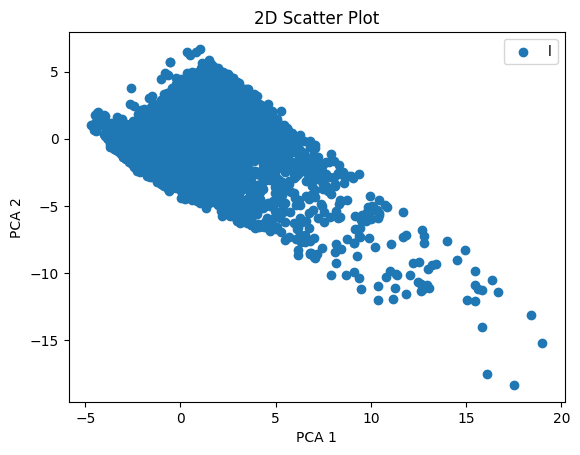

In [14]:
plt.scatter(pc_df['PC1'], pc_df['PC2'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('2D Scatter Plot')
plt.legend('labels_for_4')
plt.show()


***Model***

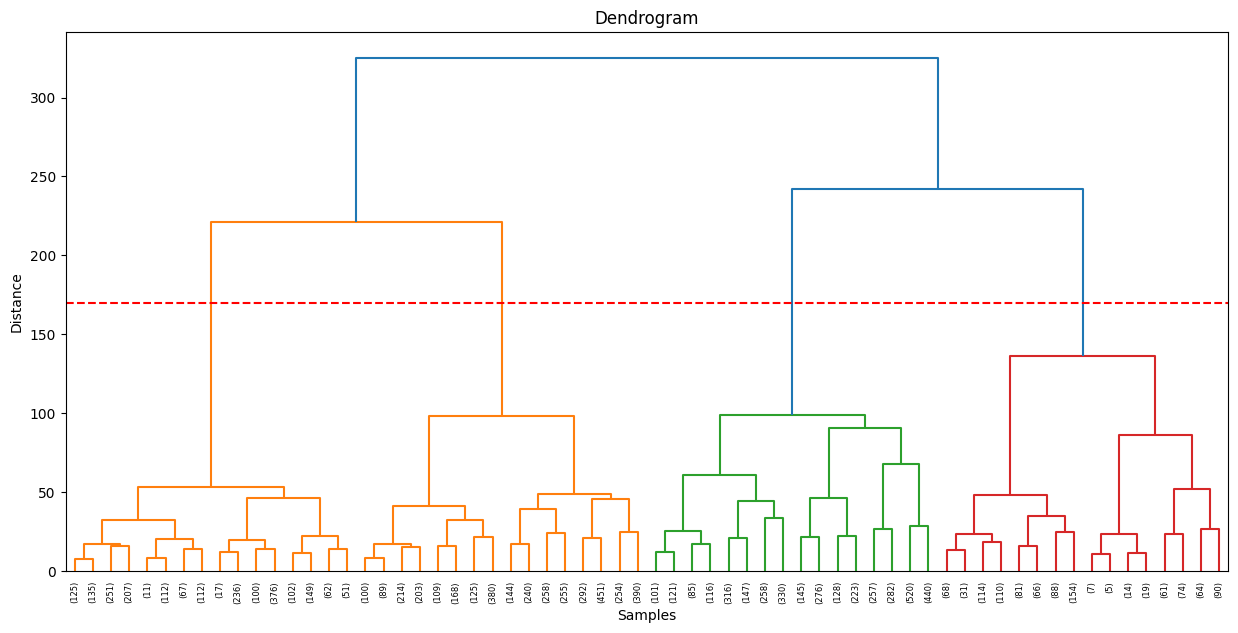

In [42]:
linkage_matrix = sch.linkage(pc_df, method='ward')
plt.figure(figsize=(15, 7))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=170, color='r', linestyle='--') 
plt.show()


Cut manually from **170**

In [38]:
cluster_from_170 = fcluster(linkage_matrix, 170, criterion='distance')

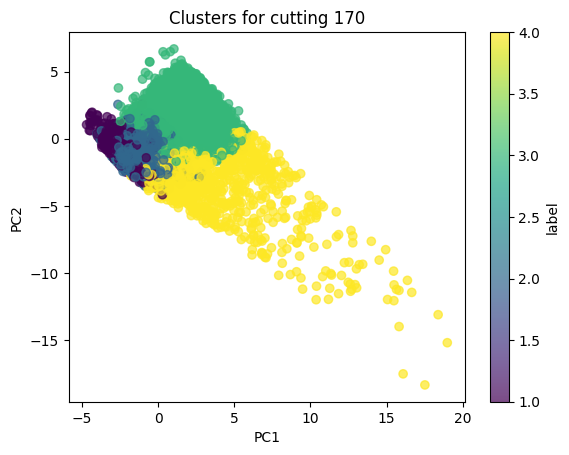

In [40]:
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=cluster_from_170, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters for cutting 170")
plt.colorbar(label="label")
plt.show()

Bura 3 d lazimdir

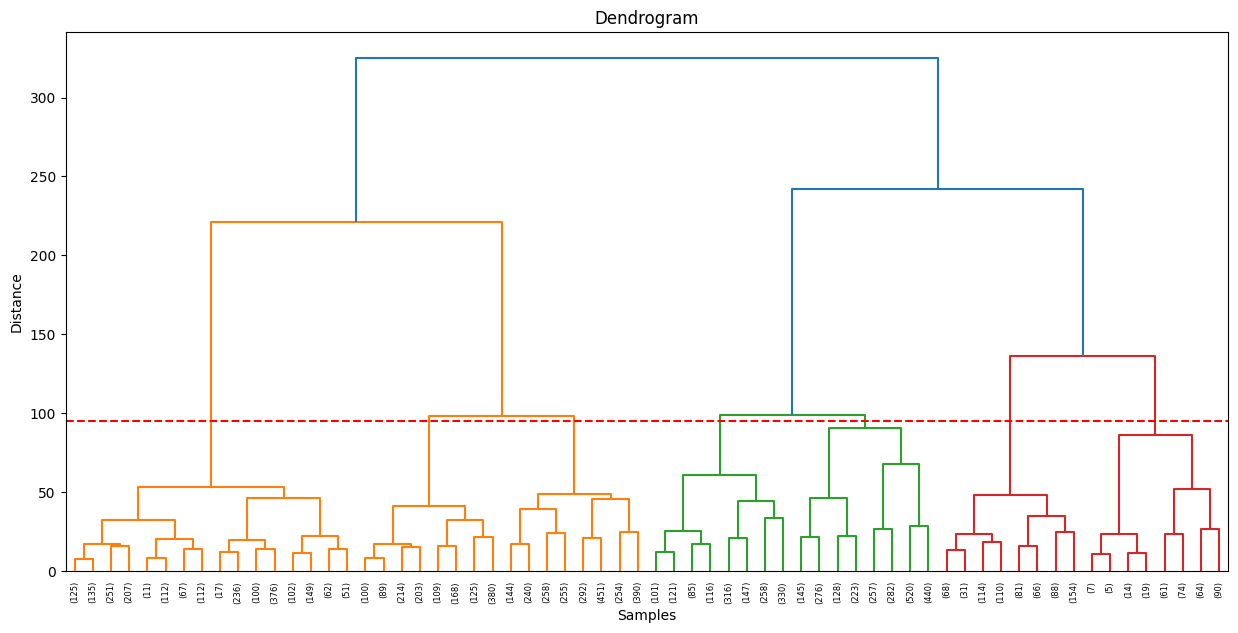

In [44]:
linkage_matrix = sch.linkage(pc_df, method='ward')
plt.figure(figsize=(15, 7))
sch.dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=95, color='r', linestyle='--') 
plt.show()


In [47]:
cluster_from_95 = fcluster(linkage_matrix, 95, criterion='distance')

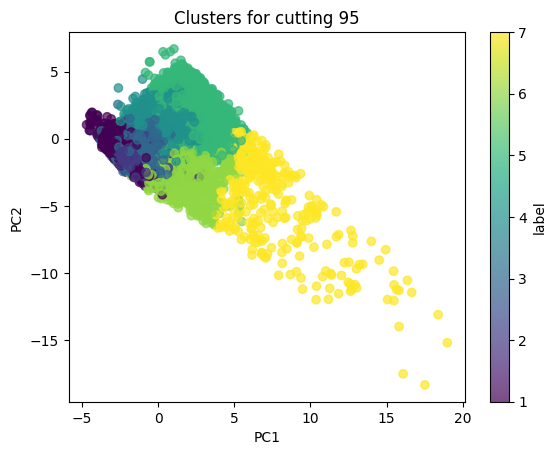

In [48]:
plt.scatter(pc_df['PC1'], pc_df['PC2'], c=cluster_from_95, cmap='viridis', alpha=0.7)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters for cutting 95")
plt.colorbar(label="label")
plt.show()

Bura 3 d lazimdir

***Model with outomatically***

In [61]:
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_predict = ac.fit_predict(pc_array)


In [63]:
pc_array= pc_df.values

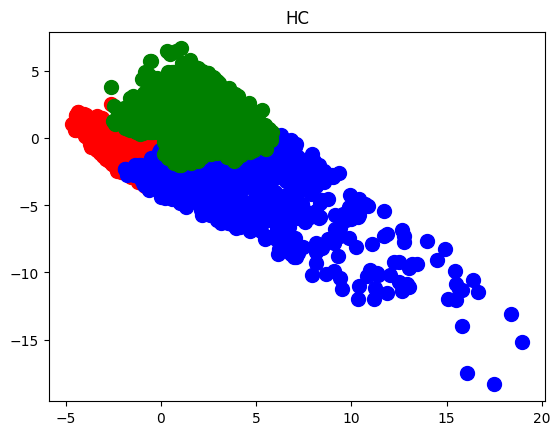

In [62]:
plt.scatter(pc_array[hc_predict == 0, 0], pc_array[hc_predict == 0, 1], s=100, c='red')
plt.scatter(pc_array[hc_predict == 1, 0], pc_array[hc_predict == 1, 1], s=100, c='blue')
plt.scatter(pc_array[hc_predict == 2, 0], pc_array[hc_predict == 2, 1], s=100, c='green')
plt.scatter(pc_array[hc_predict == 3, 0], pc_array[hc_predict == 3, 1], s=100, c='yellow')
plt.title('HC')
plt.show()

Bura 3 d lazimdir

In [67]:
ac_2 = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
hc_predict2 = ac_2.fit_predict(pc_array)


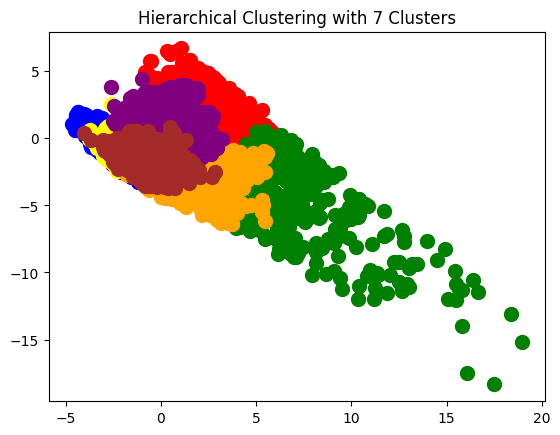

In [68]:
plt.scatter(pc_df.iloc[hc_predict2 == 0, 0], pc_df.iloc[hc_predict2 == 0, 1], s=100, c='red')
plt.scatter(pc_df.iloc[hc_predict2 == 1, 0], pc_df.iloc[hc_predict2 == 1, 1], s=100, c='blue')
plt.scatter(pc_df.iloc[hc_predict2 == 2, 0], pc_df.iloc[hc_predict2 == 2, 1], s=100, c='green')
plt.scatter(pc_df.iloc[hc_predict2 == 3, 0], pc_df.iloc[hc_predict2 == 3, 1], s=100, c='yellow')
plt.scatter(pc_df.iloc[hc_predict2 == 4, 0], pc_df.iloc[hc_predict2 == 4, 1], s=100, c='orange')
plt.scatter(pc_df.iloc[hc_predict2 == 5, 0], pc_df.iloc[hc_predict2 == 5, 1], s=100, c='purple')
plt.scatter(pc_df.iloc[hc_predict2 == 6, 0], pc_df.iloc[hc_predict2 == 6, 1], s=100, c='brown')

plt.title('Hierarchical Clustering with 7 Clusters')
plt.show()

Bir de bura 3d lazimdir